In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
nba=pd.read_excel('NBA_players_2017(2).xlsx', index_col=0)
nba.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,AST,STL,BLK,TOV,PF,PTS,PPG,RPG,APG,BPG
Column1,,,,,,,,,,,,,,,,,,,,,
24096,2017,Alex Abrines,SG,23,OKC,68,6,1055,10.1,0.560,...,40,37,8,33,114,406,5.970588,1.264706,0.588235,0.117647
24097,2017,Quincy Acy,PF,26,TOT,38,1,558,11.8,0.565,...,18,14,15,21,67,222,5.842105,3.026316,0.473684,0.394737
24098,2017,Quincy Acy,PF,26,DAL,6,0,48,-1.4,0.355,...,0,0,0,2,9,13,2.166667,1.333333,0.000000,0.000000
24099,2017,Quincy Acy,PF,26,BRK,32,1,510,13.1,0.587,...,18,14,15,19,58,209,6.531250,3.343750,0.562500,0.468750
24100,2017,Steven Adams,C,23,OKC,80,80,2389,16.5,0.589,...,86,88,78,146,195,905,11.312500,7.687500,1.075000,0.975000


In [39]:
#get center and PG  out
mask=(nba['Pos']== 'PG') | (nba['Pos'] == 'C')
PG_C= nba[mask]
PG_C.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,AST,STL,BLK,TOV,PF,PTS,PPG,RPG,APG,BPG
Column1,,,,,,,,,,,,,,,,,,,,,
24100,2017,Steven Adams,C,23,OKC,80,80,2389,16.5,0.589,...,86,88,78,146,195,905,11.312500,7.687500,1.075000,0.975000
24102,2017,Alexis Ajinca,C,28,NOP,39,15,584,12.9,0.529,...,12,20,22,31,77,207,5.307692,4.538462,0.307692,0.564103
24103,2017,Cole Aldrich,C,28,MIN,62,0,531,12.7,0.549,...,25,25,23,17,85,105,1.693548,2.548387,0.403226,0.370968
24108,2017,Chris Andersen,C,38,CLE,12,0,114,11.6,0.497,...,5,5,7,5,20,28,2.333333,2.583333,0.416667,0.583333
24117,2017,Joel Anthony,C,34,SAS,19,0,122,11.6,0.640,...,3,2,6,4,11,25,1.315789,1.631579,0.157895,0.315789


In [40]:
PG_C=PG_C[['Player','Pos','BPG','APG']]
PG_C.head()

,Player,Pos,BPG,APG
Column1,,,,
24100,Steven Adams,C,0.975000,1.075000
24102,Alexis Ajinca,C,0.564103,0.307692
24103,Cole Aldrich,C,0.370968,0.403226
24108,Chris Andersen,C,0.583333,0.416667
24117,Joel Anthony,C,0.315789,0.157895


In [41]:
PG_C=PG_C[(PG_C['BPG']> 0.0) | (PG_C['APG'] >0.0)]
PG_C.head()

,Player,Pos,BPG,APG
Column1,,,,
24100,Steven Adams,C,0.975000,1.075000
24102,Alexis Ajinca,C,0.564103,0.307692
24103,Cole Aldrich,C,0.370968,0.403226
24108,Chris Andersen,C,0.583333,0.416667
24117,Joel Anthony,C,0.315789,0.157895


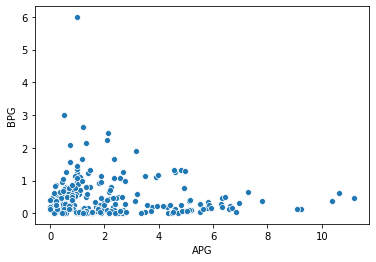

In [42]:
#use seaborn scatter function to see the scattering of BPG and APG
import seaborn as sns
data= PG_C[['APG','BPG']]
sns.scatterplot( data=data ,x='APG', y='BPG')

---
Kmeans

In [43]:
#this is a ml library in python 
#from sklearn.cluster
#specify number of clusters and fit the data
from sklearn.cluster import KMeans

In [44]:
kmeans= KMeans(n_clusters=2, random_state=0).fit(data)

In [45]:
# kmeans

In [46]:
#
kmeans.cluster_centers_
#first is PG, last is C

array([[5.6164887 , 0.3483313 ],
       [1.29036682, 0.54937702]])

In [47]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1])

In [48]:
labels=list(kmeans.labels_)
for index in range(len(labels)):
    if labels[index]==0:
        labels[index]='PG'
    else:
        labels[index]='C'
labels[:10]


['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'PG', 'PG']

In [49]:
#we compare the predictions with the kmean labels to see the accuracy
sum(labels == PG_C ['Pos'])/len(labels)
#is unsupervised ml

0.6592920353982301

In [50]:
PG_C['Pos']

Column1
24100     C
24102     C
24103     C
24108     C
24117     C
         ..
24681    PG
24683    PG
24687     C
24688     C
24690     C
Name: Pos, Length: 226, dtype: object

In [51]:
PG_C['ClusterLabel'] =labels
PG_C.head()

,Player,Pos,BPG,APG,ClusterLabel
Column1,,,,,
24100,Steven Adams,C,0.975000,1.075000,C
24102,Alexis Ajinca,C,0.564103,0.307692,C
24103,Cole Aldrich,C,0.370968,0.403226,C
24108,Chris Andersen,C,0.583333,0.416667,C
24117,Joel Anthony,C,0.315789,0.157895,C


<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, **kwargs)>

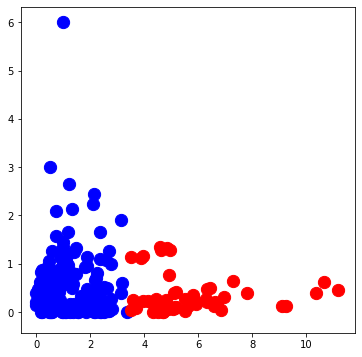

In [52]:
# draw a scatter chart based on predictions of labels
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(1,1,1)
C=PG_C[PG_C['ClusterLabel']=='C']
ax.scatter(C['APG'],C['BPG'],color='b',s=150)
PG=PG_C[PG_C['ClusterLabel']=='PG']
ax.scatter(PG['APG'],PG['BPG'],color='r',s=150)
plt.xlabel

# sns.scatterplot(x=C['APG'], y=C['BPG'], color='b', s=100)
# sns.scatterplot(x=PG['APG'], y=PG['BPG'], color='r', s=100)
# plt.legend(['center', 'Point Guard'])


---
KNN

In [53]:
#KNN example
data= PG_C[['APG','BPG']].values #x
data

array([[ 1.075     ,  0.975     ],
       [ 0.30769231,  0.56410256],
       [ 0.40322581,  0.37096774],
       [ 0.41666667,  0.58333333],
       [ 0.15789474,  0.31578947],
       [ 0.48387097,  0.32258065],
       [ 2.67948718,  0.01282051],
       [ 1.84848485,  0.21212121],
       [ 5.51428571,  0.02857143],
       [ 4.33333333,  0.        ],
       [ 0.42666667,  0.52      ],
       [ 0.91358025,  1.12345679],
       [ 0.58208955,  0.65671642],
       [ 6.33333333,  0.46969697],
       [ 1.81481481,  0.92592593],
       [ 1.88461538,  0.96153846],
       [ 1.92307692,  0.13846154],
       [ 0.56      ,  0.        ],
       [ 1.75438596,  0.0877193 ],
       [ 2.14634146,  0.02439024],
       [ 2.125     ,  0.04166667],
       [ 2.17647059,  0.        ],
       [ 0.98461538,  1.23076923],
       [ 2.51111111,  0.51111111],
       [ 1.06666667,  0.6       ],
       [ 0.63829787,  0.5106383 ],
       [ 2.03125   ,  0.09375   ],
       [ 1.07692308,  0.        ],
       [ 4.58823529,

In [54]:
target = PG_C['Pos'].values #y
target

array(['C', 'C', 'C', 'C', 'C', 'C', 'PG', 'PG', 'PG', 'PG', 'C', 'C',
       'C', 'PG', 'C', 'C', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'C', 'PG',
       'C', 'C', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'C', 'C', 'C',
       'PG', 'PG', 'C', 'C', 'C', 'PG', 'PG', 'PG', 'PG', 'PG', 'C', 'PG',
       'C', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'C', 'PG', 'PG', 'PG',
       'PG', 'PG', 'C', 'PG', 'PG', 'PG', 'C', 'C', 'PG', 'C', 'C', 'PG',
       'C', 'C', 'PG', 'C', 'PG', 'PG', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'PG', 'PG', 'C', 'C', 'C', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'C',
       'PG', 'PG', 'PG', 'PG', 'C', 'C', 'PG', 'C', 'C', 'C', 'C', 'PG',
       'C', 'PG', 'C', 'PG', 'PG', 'PG', 'C', 'C', 'C', 'C', 'PG', 'PG',
       'PG', 'C', 'C', 'C', 'PG', 'C', 'C', 'PG', 'C', 'C', 'PG', 'PG',
       'C', 'PG', 'PG', 'PG', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'PG', 'PG', 'PG', 'PG', 'PG',
       'PG', 'PG', 'C', 'C', 'C', 'C', 'C', '

In [55]:
len(target)

226

In [56]:
#we want to divide the data set into training set and test set
from sklearn.model_selection import train_test_split
#call the function to split the set
x_train,x_test,y_train,y_test= train_test_split(data,target,test_size=0.25,random_state=0)

In [57]:
#import the knn algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [58]:
#test algo. after the training using test set
pred = knn.predict(x_test)
score = knn.score(x_test,y_test) #needs x and y
score

0.9473684210526315

In [59]:
#logistic regression
from sklearn.linear_model import LogisticRegression
log= LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
x_train

array([[ 3.50617284,  1.13580247],
       [ 3.70491803,  0.08196721],
       [ 0.98461538,  1.23076923],
       [ 0.6       ,  0.2       ],
       [ 5.80555556,  0.34722222],
       [ 5.79452055,  0.17808219],
       [ 6.45121951,  0.48780488],
       [ 0.15789474,  0.31578947],
       [ 0.57142857,  1.27272727],
       [ 0.60810811,  0.5       ],
       [ 1.6969697 ,  0.18181818],
       [ 2.34375   ,  1.09375   ],
       [ 2.03125   ,  0.09375   ],
       [ 0.22222222,  0.37037037],
       [ 0.57894737,  0.80263158],
       [ 6.33333333,  0.46969697],
       [ 0.19178082,  0.83561644],
       [ 2.26086957,  0.08695652],
       [ 1.06666667,  0.6       ],
       [ 1.85714286,  0.        ],
       [ 0.25714286,  0.34285714],
       [ 5.15384615,  0.09230769],
       [ 2.3875    ,  0.275     ],
       [ 6.59259259,  0.12345679],
       [ 2.16      ,  0.45333333],
       [ 2.14634146,  0.02439024],
       [ 0.75      ,  0.125     ],
       [ 6.95      ,  0.31666667],
       [ 1.38095238,

In [61]:
y_train

array(['C', 'PG', 'C', 'C', 'PG', 'PG', 'PG', 'C', 'C', 'C', 'PG', 'C',
       'PG', 'C', 'C', 'PG', 'C', 'PG', 'C', 'PG', 'C', 'PG', 'PG', 'PG',
       'C', 'PG', 'PG', 'PG', 'PG', 'PG', 'C', 'PG', 'PG', 'PG', 'C', 'C',
       'C', 'C', 'C', 'C', 'PG', 'C', 'PG', 'PG', 'PG', 'PG', 'C', 'C',
       'PG', 'PG', 'C', 'C', 'PG', 'C', 'C', 'PG', 'C', 'PG', 'PG', 'PG',
       'C', 'PG', 'PG', 'C', 'PG', 'PG', 'C', 'C', 'PG', 'C', 'PG', 'C',
       'C', 'PG', 'C', 'PG', 'C', 'C', 'PG', 'C', 'PG', 'C', 'PG', 'C',
       'C', 'PG', 'PG', 'C', 'PG', 'C', 'PG', 'C', 'PG', 'C', 'PG', 'C',
       'PG', 'PG', 'PG', 'C', 'PG', 'PG', 'C', 'PG', 'C', 'C', 'PG', 'PG',
       'PG', 'C', 'C', 'C', 'PG', 'C', 'PG', 'PG', 'C', 'C', 'C', 'C',
       'PG', 'C', 'C', 'C', 'PG', 'C', 'PG', 'PG', 'PG', 'C', 'C', 'PG',
       'C', 'PG', 'PG', 'PG', 'C', 'PG', 'PG', 'C', 'C', 'C', 'PG', 'C',
       'C', 'C', 'C', 'C', 'C', 'PG', 'PG', 'C', 'PG', 'PG', 'C', 'C',
       'PG', 'C', 'PG', 'PG', 'PG', 'PG', 'C', 'C', 

In [62]:
# y_train.describe()

In [63]:
# y_train=y_train.astype(str)

In [64]:
pred=log.predict(x_test) #outcome of algo.
pred

array(['PG', 'C', 'C', 'C', 'PG', 'PG', 'PG', 'C', 'PG', 'PG', 'C', 'PG',
       'PG', 'PG', 'PG', 'C', 'C', 'C', 'PG', 'PG', 'C', 'C', 'PG', 'PG',
       'PG', 'PG', 'C', 'PG', 'C', 'C', 'C', 'PG', 'C', 'C', 'PG', 'PG',
       'C', 'C', 'PG', 'PG', 'PG', 'C', 'C', 'PG', 'PG', 'C', 'C', 'PG',
       'C', 'PG', 'C', 'PG', 'C', 'PG', 'PG', 'C', 'PG'], dtype=object)

In [65]:
y_test #answer of testing data

array(['PG', 'C', 'PG', 'C', 'PG', 'PG', 'PG', 'C', 'PG', 'PG', 'C', 'PG',
       'PG', 'PG', 'PG', 'C', 'C', 'C', 'PG', 'PG', 'C', 'C', 'PG', 'PG',
       'C', 'PG', 'C', 'PG', 'C', 'C', 'C', 'PG', 'C', 'C', 'PG', 'PG',
       'C', 'C', 'PG', 'PG', 'PG', 'C', 'C', 'PG', 'PG', 'C', 'C', 'PG',
       'C', 'PG', 'C', 'PG', 'C', 'PG', 'PG', 'C', 'PG'], dtype=object)

In [66]:
#get the score
score=log.score(x_test,y_test)
score

0.9649122807017544

---
Linear Regression


In [67]:
#Linear regression
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
housing = pd.read_csv('USA_housing.csv')
housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [69]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [70]:
housing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [71]:
housing.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [72]:
# y=b1x1+b2x2+b3x3+b4x4+b5x5+b0 #y=price, b=intercept
x=housing[['Avg. Area Income','Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms','Area Population']]
y=housing['Price']

In [73]:
#splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)
#import linear model
from sklearn.linear_model import LinearRegression
lg=LinearRegression()
lg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

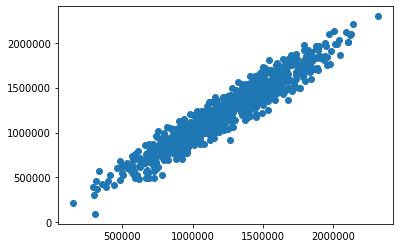

In [74]:
#we give the test data to the model to predict the price
pred= lg.predict(x_test)
plt.scatter(y_test,pred) #here pred is y_test (predicted)


In [75]:
import numpy as np
# lg.predict(np.array([8000,10,6,3,35000]))
# lg.predict(x_test)[0]

In [76]:
x_test.values[0]#five values

array([6.12007262e+04, 5.29969400e+00, 6.23461464e+00, 4.23000000e+00,
       4.27896922e+04])

In [77]:
lg.predict(x_test)[0]# predicted value of 0th house

971305.217156304

In [78]:
y_test.values[0] #value of housing

894251.0686357756

In [79]:
#prediction =linear and  classificationisticRegressiicRegression(on

# remember: linear regression is only algo for prediction of values.
# remember: logistic regression is only algo for prediction of labels.



In [80]:
#accuracy of algo depending about random state for knn algo. depends no. of neigbors parameter # fit func=train , pred func=test
#adjusting parameters like n_neigbors in knn for getting the accuracy

# when giving exam :1.read questions and requirements 2.determine prediction of num of value/classification question or regression question. if classification problem : supervised(with label): logistic reg, knn or unsupervised(without):kmeans


In [81]:
"""89
Q. Predict age of a person #linear as supervised and continous(independently regression algorithm)
Q. Predict marks of student#linear as supervised and continous values
Q. Predict pass or fail #classification:knn or logistic
"""

'89\nQ. Predict age of a person #linear as supervised and continous(independently regression algorithm)\nQ. Predict marks of student#linear as supervised and continous values\nQ. Predict pass or fail #classification:knn or logistic\n'